In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import time

In [2]:
#import the dataset 
aisles = pd.read_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\grocery data\\aisles.csv")
departments = pd.read_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\grocery data\\departments.csv")
order_products_prior = pd.read_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\grocery data\\order_products__prior.csv")
order_products_train = pd.read_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\grocery data\\order_products__train.csv")
orders = pd.read_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\grocery data\\orders.csv")
products = pd.read_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\grocery data\\products.csv")

In [3]:
#showing total number of columns
aisles.head(15)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [4]:
departments.head(15)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [5]:
order_products_prior.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [6]:
orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_details
0,2539329,1,prior,1,2,8,NaN,6.0
1,2398795,1,prior,2,3,7,15.0,NaN
2,473747,1,prior,3,3,12,21.0,NaN
3,2254736,1,prior,4,4,7,29.0,5.0
4,431534,1,prior,5,4,15,28.0,NaN
5,3367565,1,prior,6,2,7,19.0,NaN
6,550135,1,prior,7,1,9,20.0,NaN
7,3108588,1,prior,8,1,14,14.0,NaN
8,2295261,1,prior,9,1,16,0.0,NaN
9,2550362,1,prior,10,4,8,30.0,NaN


In [7]:
products.head(15)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [8]:
order_products_train.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [9]:
products.value_counts()

product_id  product_name                                     aisle_id  department_id
1           Chocolate Sandwich Cookies                       61        19               1
33142       Black Raspberry Water                            100       21               1
33120       Organic Egg Whites                               86        16               1
33121       Oikos Yogurt Drink, Strawberry                   120       16               1
33122       Peanut Butter Dark Chocolate Protein Chewy Bars  3         19               1
                                                                                       ..
16566       Fajita Mix                                       123       4                1
16567       Premium Enriched Egg Noodles Barley Shape        33        6                1
16568       Dishwasher Detergent                             74        17               1
16569       Hummus Original                                  67        20               1
49688       Fre

In [10]:
orders.value_counts()

order_id  user_id  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior_order  order_details
2254736   1        prior     4             4          7                  29.0                    5.0              1
dtype: int64

In [11]:
#showing total number of columns
departments.columns

Index(['department_id', 'department'], dtype='object')

In [12]:
departments['department']

0              frozen
1               other
2              bakery
3             produce
4             alcohol
5       international
6           beverages
7                pets
8     dry goods pasta
9                bulk
10      personal care
11       meat seafood
12             pantry
13          breakfast
14       canned goods
15         dairy eggs
16          household
17             babies
18             snacks
19               deli
20            missing
Name: department, dtype: object

In [13]:
aisles['aisle'].unique

<bound method Series.unique of 0           prepared soups salads
1               specialty cheeses
2             energy granola bars
3                   instant foods
4      marinades meat preparation
                  ...            
129      hot cereal pancake mixes
130                     dry pasta
131                        beauty
132    muscles joints pain relief
133    specialty wines champagnes
Name: aisle, Length: 134, dtype: object>

In [14]:
#showing total number of columns
order_products_prior.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [15]:
#showing total number of columns
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'order_details'],
      dtype='object')

In [16]:
#showing total number of columns
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [17]:
#Run the command 
aisles.dtypes

aisle_id     int64
aisle       object
dtype: object

In [18]:
departments.dtypes

department_id     int64
department       object
dtype: object

In [19]:
order_products_prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [20]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
order_details             float64
dtype: object

In [21]:
products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [22]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [23]:
orders.isna().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order      63100
order_details             1048573
dtype: int64

In [24]:
#delete column "order_details"
del(orders["order_details"])

In [25]:
#replacing null values in column "days_since_prior_order"
orders["days_since_prior_order"].fillna("0", inplace = True)

In [26]:
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [27]:
orders.days_since_prior_order.value_counts()


30.0    112498
7.0      98756
6.0      73424
4.0      67774
3.0      66728
5.0      65969
0        63100
2.0      59256
8.0      55759
1.0      44010
9.0      36115
14.0     30802
10.0     29562
13.0     25552
11.0     24763
12.0     23600
0.0      20627
15.0     20620
16.0     14487
21.0     13829
17.0     12048
20.0     11722
18.0     11047
19.0     10682
22.0      9787
28.0      7999
23.0      7282
27.0      6770
24.0      6362
25.0      5943
26.0      5883
29.0      5819
Name: days_since_prior_order, dtype: int64

In [28]:
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [29]:
departments.isna().sum()


department_id    0
department       0
dtype: int64

In [30]:
# transform data 
round(departments.describe().T,2)
departments.describe().T

,count,mean,std,min,25%,50%,75%,max
department_id,21.0,11.0,6.204837,1.0,6.0,11.0,16.0,21.0


In [31]:
# transform data 
round(products.describe().T,2)
products.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,49688.0,24844.500000,14343.834425,1.0,12422.75,24844.5,37266.25,49688.0
aisle_id,49688.0,67.769582,38.316162,1.0,35.00,69.0,100.00,134.0
department_id,49688.0,11.728687,5.850410,1.0,7.00,13.0,17.00,21.0


In [32]:
# transform data 
round(orders.describe().T,2)
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1048575.0,1.710968e+06,987577.404683,6.0,855467.0,1710657.0,2566970.5,3421083.0
user_id,1048575.0,3.156404e+04,18166.949570,1.0,15896.0,31608.0,47297.0,63100.0
order_number,1048575.0,1.717418e+01,17.710936,1.0,5.0,11.0,23.0,100.0
order_dow,1048575.0,2.778637e+00,2.047751,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,1048575.0,1.345229e+01,4.219144,0.0,10.0,13.0,16.0,23.0


In [33]:
# transform data 
round(order_products_prior.describe().T,2)
order_products_prior.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,32434489.0,1.710749e+06,987300.696453,2.0,855943.0,1711048.0,2565514.0,3421083.0
product_id,32434489.0,2.557634e+04,14096.689090,1.0,13530.0,25256.0,37935.0,49688.0
add_to_cart_order,32434489.0,8.351076e+00,7.126671,1.0,3.0,6.0,11.0,145.0
reordered,32434489.0,5.896975e-01,0.491889,0.0,0.0,1.0,1.0,1.0


In [34]:
# transform data 
round(aisles.describe().T,2)
aisles.describe().T

,count,mean,std,min,25%,50%,75%,max
aisle_id,134.0,67.5,38.826537,1.0,34.25,67.5,100.75,134.0


In [35]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [36]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [37]:
print(len(products))
print(products.aisle_id.nunique())
print(products.department_id.nunique())

49688
134
21


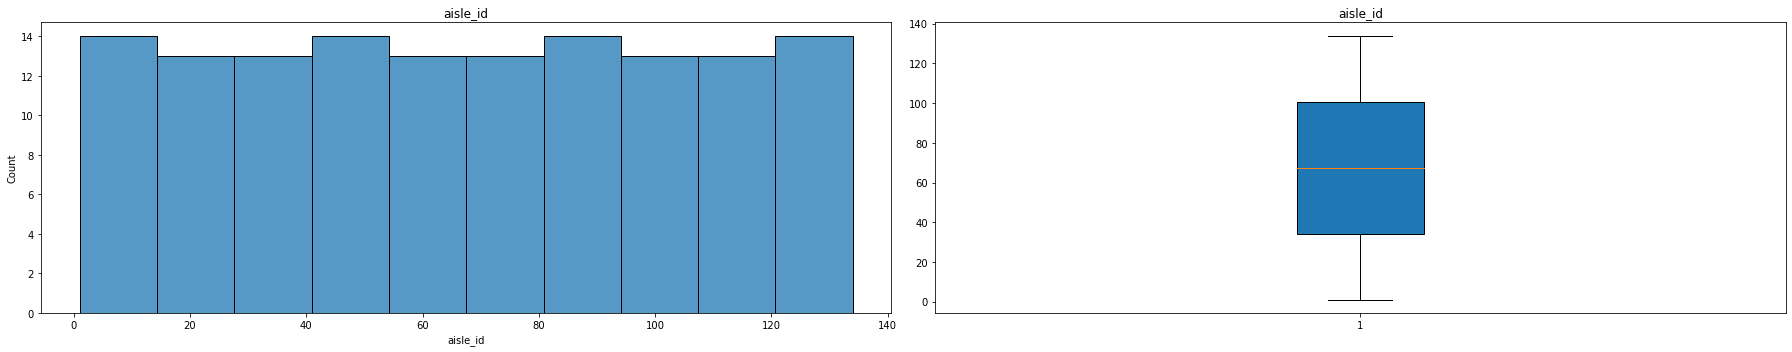

In [38]:
#to make histplot and boxplot 
fig, axes = plt.subplots(1,2, figsize=(25,5))
sns.histplot(aisles['aisle_id'], bins=10,ax=axes[0])
plt.boxplot(aisles['aisle_id'],patch_artist = True)


axes[0].set_title('aisle_id')
axes[1].set_title('aisle_id')
plt.tight_layout()
plt.show()

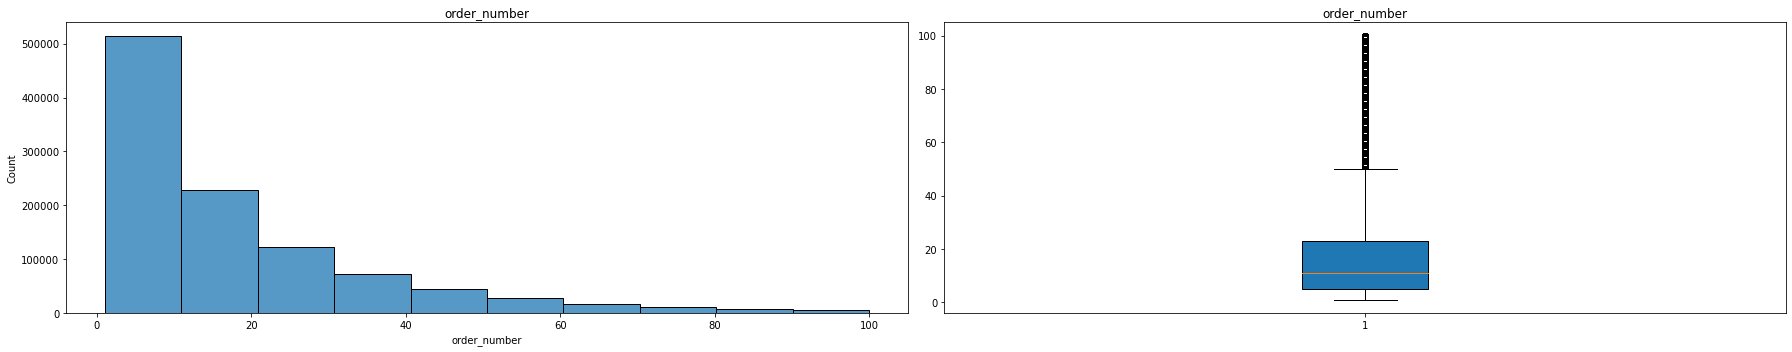

In [39]:
#to make histplot and boxplot 
fig, axes = plt.subplots(1,2, figsize=(25,5))
sns.histplot(orders['order_number'], bins=10,ax=axes[0])
plt.boxplot(orders['order_number'],patch_artist = True)


axes[0].set_title('order_number')
axes[1].set_title('order_number')
plt.tight_layout()
plt.show()

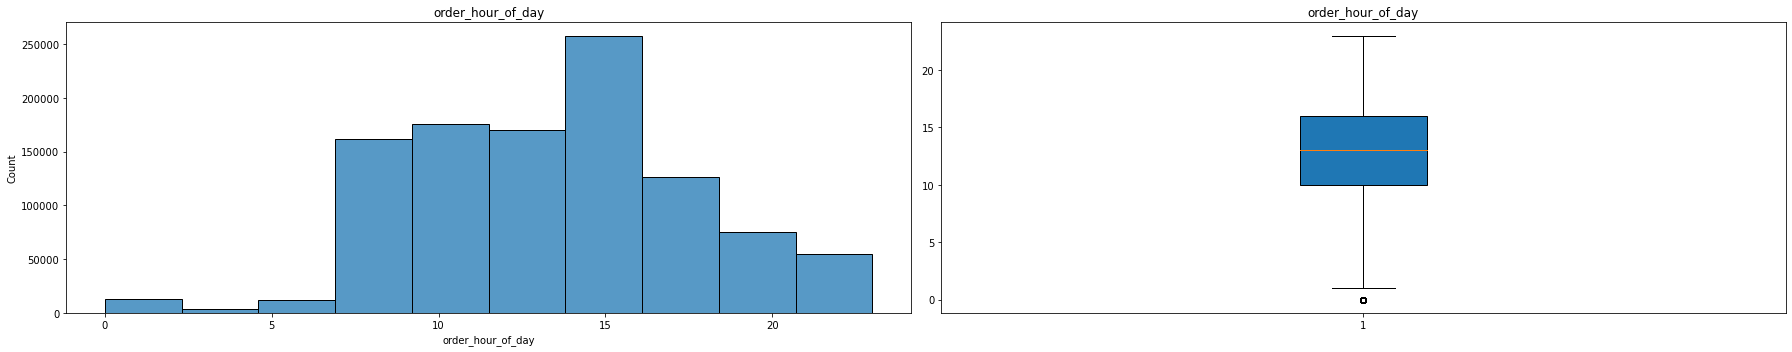

In [40]:
#to make histplot and boxplot 
fig, axes = plt.subplots(1,2, figsize=(25,5))
sns.histplot(orders['order_hour_of_day'], bins=10,ax=axes[0])
plt.boxplot(orders['order_hour_of_day'],patch_artist = True)


axes[0].set_title('order_hour_of_day')
axes[1].set_title('order_hour_of_day')
plt.tight_layout()
plt.show()

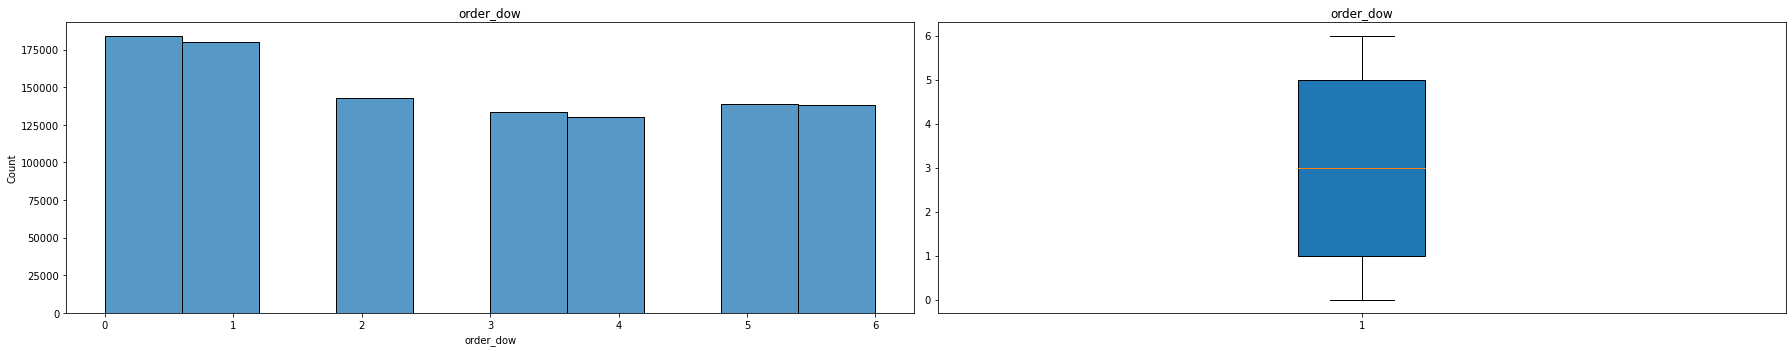

In [41]:
#to make histplot and boxplot 
fig, axes = plt.subplots(1,2, figsize=(25,5))
sns.histplot(orders['order_dow'], bins=10,ax=axes[0])
plt.boxplot(orders['order_dow'],patch_artist = True)


axes[0].set_title('order_dow')
axes[1].set_title('order_dow')
plt.tight_layout()
plt.show()

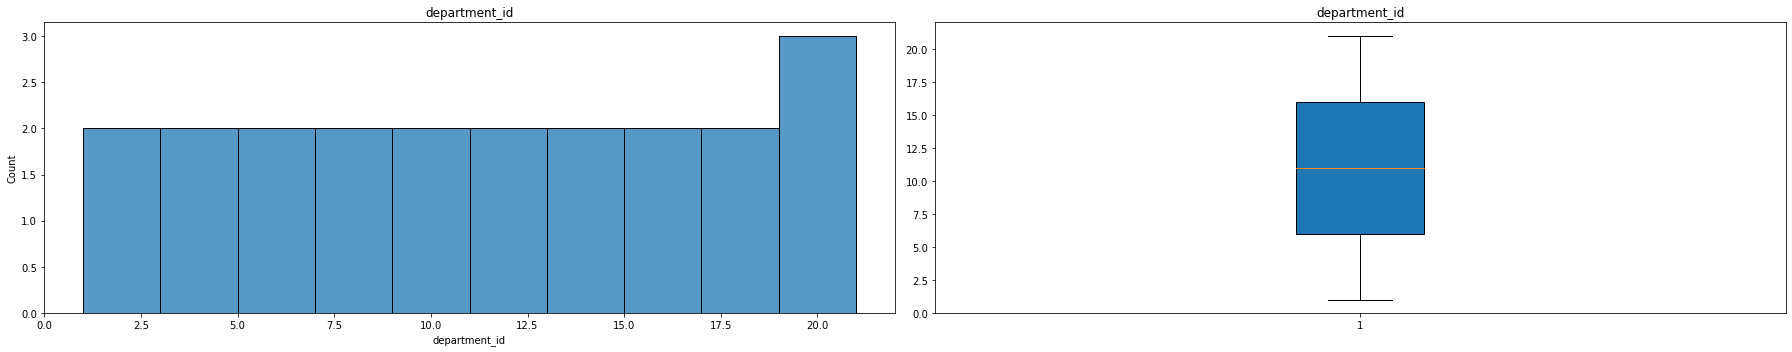

In [42]:
#to make histplot and boxplot 
fig, axes = plt.subplots(1,2, figsize=(25,5))
sns.histplot(departments['department_id'], bins=10,ax=axes[0])
plt.boxplot(departments['department_id'],patch_artist = True)


axes[0].set_title('department_id')
axes[1].set_title('department_id')
plt.tight_layout()
plt.show()

In [43]:
# How many products in each department and aisle?
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


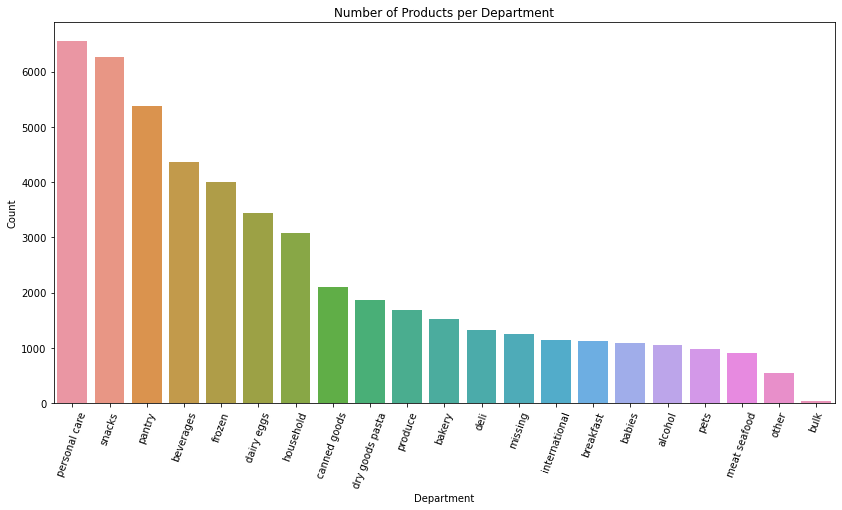

In [44]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= products_desc, order = products_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Department')
plt.show()

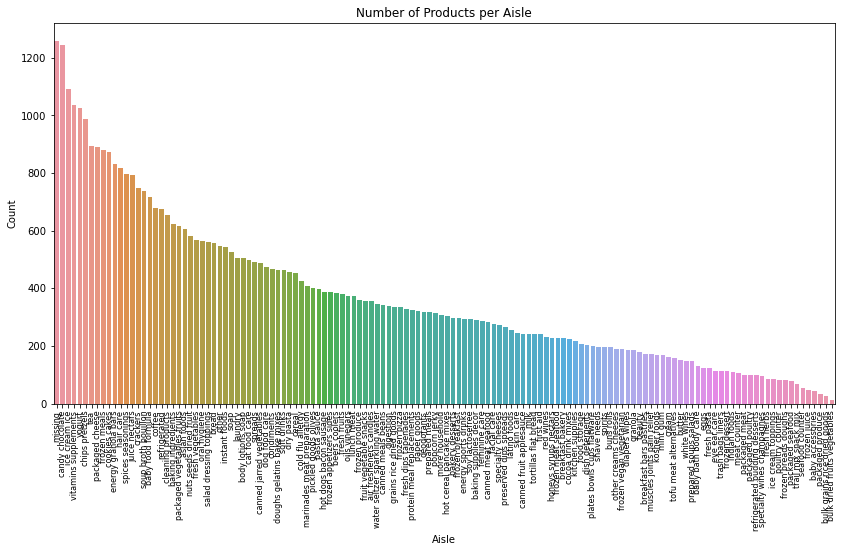

In [45]:
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= products_desc, order = products_desc.aisle.value_counts().index)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count')
plt.xlabel('Aisle')
plt.show()

In [46]:
# It appears that 1258 products have 'missing' aisle 100 and department 21
products_desc[products_desc['aisle']=='missing']


,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [47]:
# An aisle only belongs to one department
products_desc[products_desc['aisle_id']==45]

,product_id,product_name,aisle_id,department_id,aisle,department
123,124,Sun Cups Dark Chocolate,45,19,candy chocolate,snacks
135,136,Simple,45,19,candy chocolate,snacks
183,184,Kisses Milk Chocolate Candy,45,19,candy chocolate,snacks
206,207,Minis Candy Bars,45,19,candy chocolate,snacks
226,227,Triple Chocolate Snack Size,45,19,candy chocolate,snacks
...,...,...,...,...,...,...
49503,49504,Dark Chocolate Peanut Butter Cups Miniatures,45,19,candy chocolate,snacks
49600,49601,Pomegranate Gummy Bears,45,19,candy chocolate,snacks
49619,49620,Milk Chocolate Mini's,45,19,candy chocolate,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks


In [48]:
#Analyze Orders
print(len(orders))
print(orders.order_id.min())
print(orders.order_id.max())

1048575
6
3421083


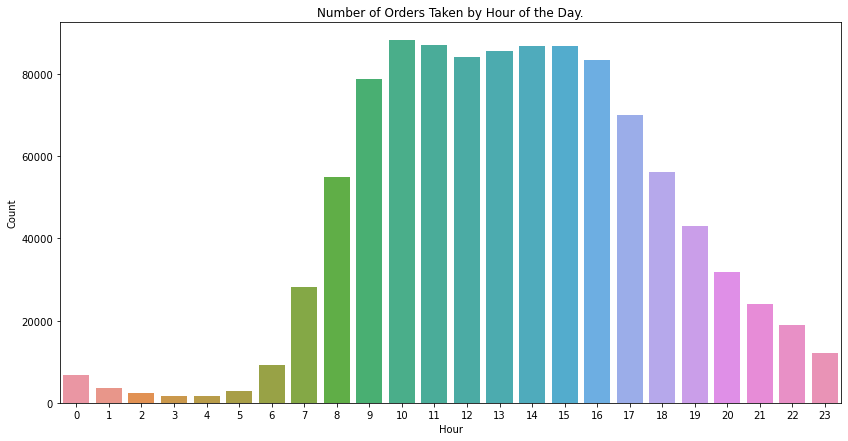

In [49]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_hour_of_day', data= orders)
plt.title('Number of Orders Taken by Hour of the Day.')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

Text(0.5, 0, 'Day')

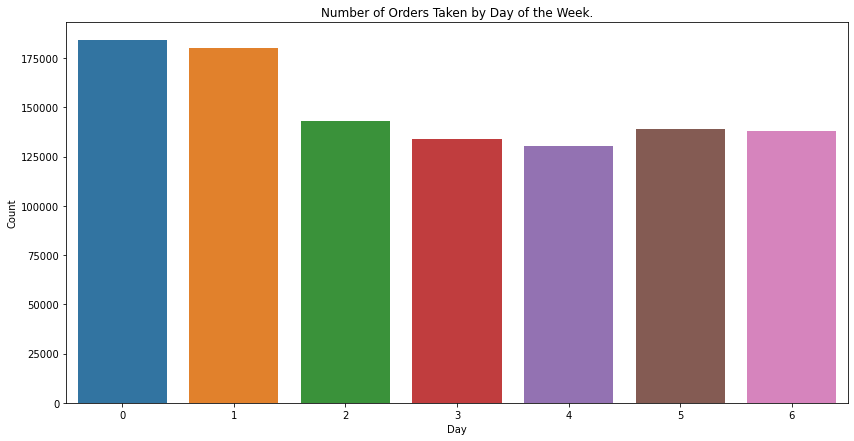

In [50]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_dow', data= orders)
plt.title('Number of Orders Taken by Day of the Week.')
plt.ylabel('Count')
plt.xlabel('Day')

                   order_id   user_id  order_number  order_dow  \
order_id           1.000000 -0.000433     -0.001118   0.000146   
user_id           -0.000433  1.000000     -0.002036  -0.002963   
order_number      -0.001118 -0.002036      1.000000   0.015453   
order_dow          0.000146 -0.002963      0.015453   1.000000   
order_hour_of_day -0.000947  0.000883     -0.034488   0.005999   

                   order_hour_of_day  
order_id                   -0.000947  
user_id                     0.000883  
order_number               -0.034488  
order_dow                   0.005999  
order_hour_of_day           1.000000  


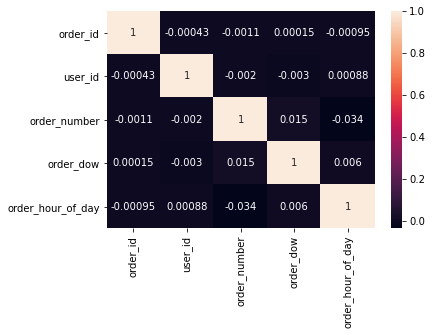

In [51]:
corrMatrix = orders.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

               product_id  aisle_id  department_id
product_id       1.000000 -0.000807       0.002074
aisle_id        -0.000807  1.000000       0.094784
department_id    0.002074  0.094784       1.000000


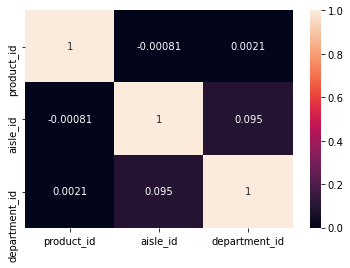

In [52]:
corrMatrix = products.corr()
print (corrMatrix)
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [53]:

#Merge order_products together
#Output: merged_order_products, order_products_desc
print(len(order_products_train))
print(len(order_products_prior))

1384617
32434489


In [54]:
# The dataframe of all order products should be the length of these two together
len(order_products_train)+len(order_products_prior)

33819106

In [55]:
# These two dataframes shouldn't have any overlap.  I need an outer join to merge them together.
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')
merged_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [56]:
len(merged_order_products)

33819106

In [57]:
products_per_order = merged_order_products.groupby('order_id').count()

In [58]:
# This has an entry for each ordered product.  If we combine it with aisle and department we can see which products
# are ordered the most.
order_products_desc = pd.merge(merged_order_products, products_desc, on = 'product_id')
order_products_desc.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [59]:
#   People mostly like bananas.
order_products_desc['product_name'].value_counts()

Banana                               491291
Bag of Organic Bananas               394930
Organic Strawberries                 275577
Organic Baby Spinach                 251705
Organic Hass Avocado                 220877
                                      ...  
Vanilla Bean Sheep Milk Ice Cream         1
Flatbread Pizza All Natural               1
Orange Flavored Ice Cubes                 1
Cld/Flu Van Chrry                         1
Indian Wells Merlot                       1
Name: product_name, Length: 49685, dtype: int64

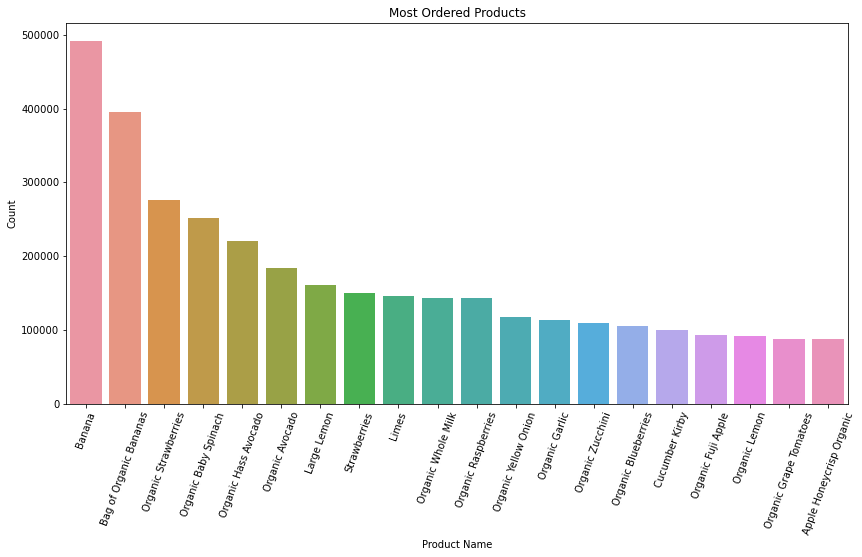

In [60]:
plt.figure(figsize = (14,7))
sns.countplot(x='product_name', data= order_products_desc, 
              order = order_products_desc.product_name.value_counts().index[:20])
plt.title('Most Ordered Products')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Product Name')
plt.show()

In [61]:
# Now merge the orders with the ordered prodcuts, combining on order_id
# This is a lot of info. We will trim some out before modeling.
merged_orders = pd.merge(orders, order_products_desc, on = 'order_id')
merged_orders.head() 

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,0,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
2,2539329,1,prior,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
3,2539329,1,prior,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,2539329,1,prior,1,2,8,0,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks


In [62]:
len(merged_orders)

10349780

In [63]:
#Clustering
#Prepare data for recommendation system
#  I need user_id, product_id, and 'number of times it was purchased'
user_item = merged_orders[['user_id', 'product_id', 'reordered']]

In [64]:
# About 6  million duplicates.  That is a person ordering an item more than once.
user_item[user_item.duplicated(subset = ['user_id', 'product_id'], keep = 'first')]

,user_id,product_id,reordered
6,1,196,1
7,1,26088,1
10,1,12427,1
11,1,196,1
13,1,10258,1
...,...,...,...
10349762,63099,7628,1
10349763,63099,34429,1
10349764,63099,44514,1
10349765,63099,28528,1


In [65]:
# Ah this is what I need.  The value counts of each product id for each user.

user_item[user_item['user_id']==1].product_id.value_counts()

196      11
10258    10
12427    10
25133     9
46149     4
13032     4
49235     3
26405     3
26088     3
39657     2
13176     2
38928     2
10326     1
41787     1
17122     1
27845     1
35951     1
30450     1
14084     1
Name: product_id, dtype: int64

In [66]:
orders[orders['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,0
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [67]:
# Creating the test set of orders
test = orders[orders['eval_set']=='test']
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [68]:
# Now I can see everything a particular user has ordered, and how often
merged_orders[merged_orders['user_id']==3]['product_name'].value_counts()

Vanilla Unsweetened Almond Milk                    10
Organic Avocado                                     9
Organic Baby Spinach                                8
Granny Smith Apples                                 5
Unsweetened Chocolate Almond Breeze Almond Milk     5
Organic Peeled Whole Baby Carrots                   4
Garlic Couscous                                     4
All Natural No Stir Creamy Almond Butter            3
Organic Whole String Cheese                         3
Strawberries                                        3
Organic Lightly Salted Brown Rice Cakes             3
Crackers, Crispy, Cheddar                           3
Brussels Sprouts                                    2
Chocolate Ice Cream                                 2
Original Rotisserie Chicken                         2
Green Beans                                         2
Wheat Gluten Free Waffles                           2
Electrolyte Water                                   2
Birthday Cake Light Ice Crea

In [69]:
merged_orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'aisle', 'department'],
      dtype='object')

In [ ]:
merged_orders.to_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\merged_orders.csv")

In [71]:
df =  pd.read_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\merged_orders.csv")

In [72]:
df1 = df.head(10000)

In [73]:
df1

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,soft drinks,beverages
1,1,2539329,1,prior,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
2,2,2539329,1,prior,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
3,3,2539329,1,prior,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,4,2539329,1,prior,1,2,8,0.0,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,643818,74,prior,1,5,8,0.0,11072,3,0,Traditionally Crafted Soba Pasta,66,6,asian foods,international
9996,9996,360105,74,prior,2,5,6,7.0,42768,9,0,Organic Garbanzo Beans,59,15,canned meals beans,canned goods
9997,9997,360105,74,prior,2,5,6,7.0,31040,4,0,Sea Salt Pita Chips,107,19,chips pretzels,snacks
9998,9998,360105,74,prior,2,5,6,7.0,6341,14,0,Brown Eggs,86,16,eggs,dairy eggs


In [ ]:
df1.to_csv("C:\\Users\\Dilpreet Singh\\OneDrive\\Desktop\\dataset for CAPSTONE\\df1.csv")

In [75]:
user_item = merged_orders[['user_id', 'product_id', 'reordered']]


In [77]:
# About 6 million duplicates.  That is a person ordering an item more than once.
user_item[user_item.duplicated(subset = ['user_id', 'product_id'], keep = 'first')]

,user_id,product_id,reordered
6,1,196,1
7,1,26088,1
10,1,12427,1
11,1,196,1
13,1,10258,1
...,...,...,...
10349762,63099,7628,1
10349763,63099,34429,1
10349764,63099,44514,1
10349765,63099,28528,1


In [78]:
  #The value counts of each product id for each user.

user_item[user_item['user_id']==1].product_id.value_counts()

196      11
10258    10
12427    10
25133     9
46149     4
13032     4
49235     3
26405     3
26088     3
39657     2
13176     2
38928     2
10326     1
41787     1
17122     1
27845     1
35951     1
30450     1
14084     1
Name: product_id, dtype: int64

In [80]:
user_item[user_item['user_id']==1].product_id.value_counts()

196      11
10258    10
12427    10
25133     9
46149     4
13032     4
49235     3
26405     3
26088     3
39657     2
13176     2
38928     2
10326     1
41787     1
17122     1
27845     1
35951     1
30450     1
14084     1
Name: product_id, dtype: int64

In [81]:
user_item[user_item['user_id']==3].product_id.value_counts()

39190    10
47766     9
21903     8
17668     5
9387      5
18599     4
43961     4
22035     3
24810     3
32402     3
1819      3
16797     3
23650     2
24010     2
48523     2
16965     2
28373     2
14992     2
44683     2
12845     1
42557     1
18370     1
38596     1
15143     1
40604     1
42265     1
7503      1
8021      1
49683     1
21137     1
1005      1
39922     1
248       1
Name: product_id, dtype: int64

In [166]:
import pickle as pickle 
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise.model_selection import train_test_split


In [ ]:
 user_item_1 =  user_item.head(50000)

In [101]:

 data=[]
data_columns=['user_id','product_id','count']
for user in user_item_1.user_id.unique():
    counts = user_item_1[user_item_1['user_id']==user].product_id.value_counts()
    for i in range(len(counts)):
        data.append([user, counts.index[i], counts.values[i]])

In [102]:
rec_df = pd.DataFrame(data, columns=data_columns)
rec_df

,user_id,product_id,count
0,1,196,11
1,1,10258,10
2,1,12427,10
3,1,25133,9
4,1,46149,4
...,...,...,...
21147,313,44359,1
21148,313,3142,1
21149,313,48679,1
21150,313,43789,1


In [141]:
# A reader is still needed but only the rating_scale param is required. test size 0.25
reader = Reader(rating_scale=(1, 100))

# The columns must correspond to user id, item id and ratings (in that order).
rec_data = Dataset.load_from_df(rec_df, reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(rec_data, test_size=.25, random_state=12)

In [ ]:
# A reader is still needed but only the rating_scale param is required. test size 0.55
reader = Reader(rating_scale=(1, 100))

# The columns must correspond to user id, item id and ratings (in that order).
rec_data = Dataset.load_from_df(rec_df, reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
new_trainset, new_testset = train_test_split(rec_data, test_size=.55, random_state=12)

In [149]:
#Start with a memory-based model

# These just take up too much memory for the size of my data.  Moving on to model-based.

sim_cos = {'name':'cosine', 'user_based':False}

tic = time.time()

basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

fit_time = time.time()-tic
print('fit ', fit_time)



Computing the cosine similarity matrix...
Done computing similarity matrix.
fit  2.2476110458374023


In [163]:
# Creating the model from the best 
#singualar value decomposition

tic = time.time()

new_svd_best_gs = SVD()

new_svd_best_gs_predictions = new_svd_best_gs.test(testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(new_svd_best_gs_predictions)

fit  1.4730935096740723
pred  0.07610034942626953
RMSE: 3.2924


3.292417726605842

In [180]:
# rmse root mean sqr error
tic = time.time()

svd_algo = SVD()

svd_algo.fit(trainset)

fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()

svd_algo_predictions = svd_algo.test(testset)

pred_time = time.time()-toc
print('pred ', pred_time)

# Then compute RMSE
accuracy.rmse(svd_algo_predictions)

fit  6.224882364273071
pred  0.047120094299316406
RMSE: 3.2924


3.292417726605842

In [177]:
new_rec_df =rec_df.drop(columns='count')
new_rec_df

,user_id,product_id
0,1,196
1,1,10258
2,1,12427
3,1,25133
4,1,46149
...,...,...
21147,313,44359
21148,313,3142
21149,313,48679
21150,313,43789
